# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

# About the Dataset
The target field, called diabetes, has two possible values that correspond to the two people groups, as follows: 0:Healthy 1:Diabetic

# Load data from CSV

In [45]:
df = pd.read_csv('diabetes1.csv')
df

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,2.51,19,female,61,119,22.5,118,70,32,38,0.842105,0
1,2,146,79,41,1.85,19,female,60,135,26.4,108,58,33,40,0.825000,0
2,3,217,75,54,2.89,20,female,67,187,29.3,110,72,40,45,0.888889,0
3,4,226,97,70,2.33,20,female,64,114,19.6,122,64,31,39,0.794872,0
4,5,164,91,67,1.80,20,female,70,141,20.2,122,86,32,39,0.820513,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,386,227,105,44,2.16,83,female,59,125,25.2,150,90,35,40,0.875000,0
386,387,226,279,52,0.81,84,female,60,192,37.5,144,88,41,48,0.854167,1
387,388,301,90,118,3.34,89,female,61,115,21.7,218,90,31,41,0.756098,0
388,389,232,184,114,1.26,91,female,61,127,24.0,170,82,35,38,0.921053,1


# Compare the pairwise correlation of all features 

In [46]:
df['gender'].replace({'female':1,'male':0},inplace=True)

In [47]:
df.drop(columns=['patient_number'],inplace=True)

# EDA

## Correlation

<Axes: >

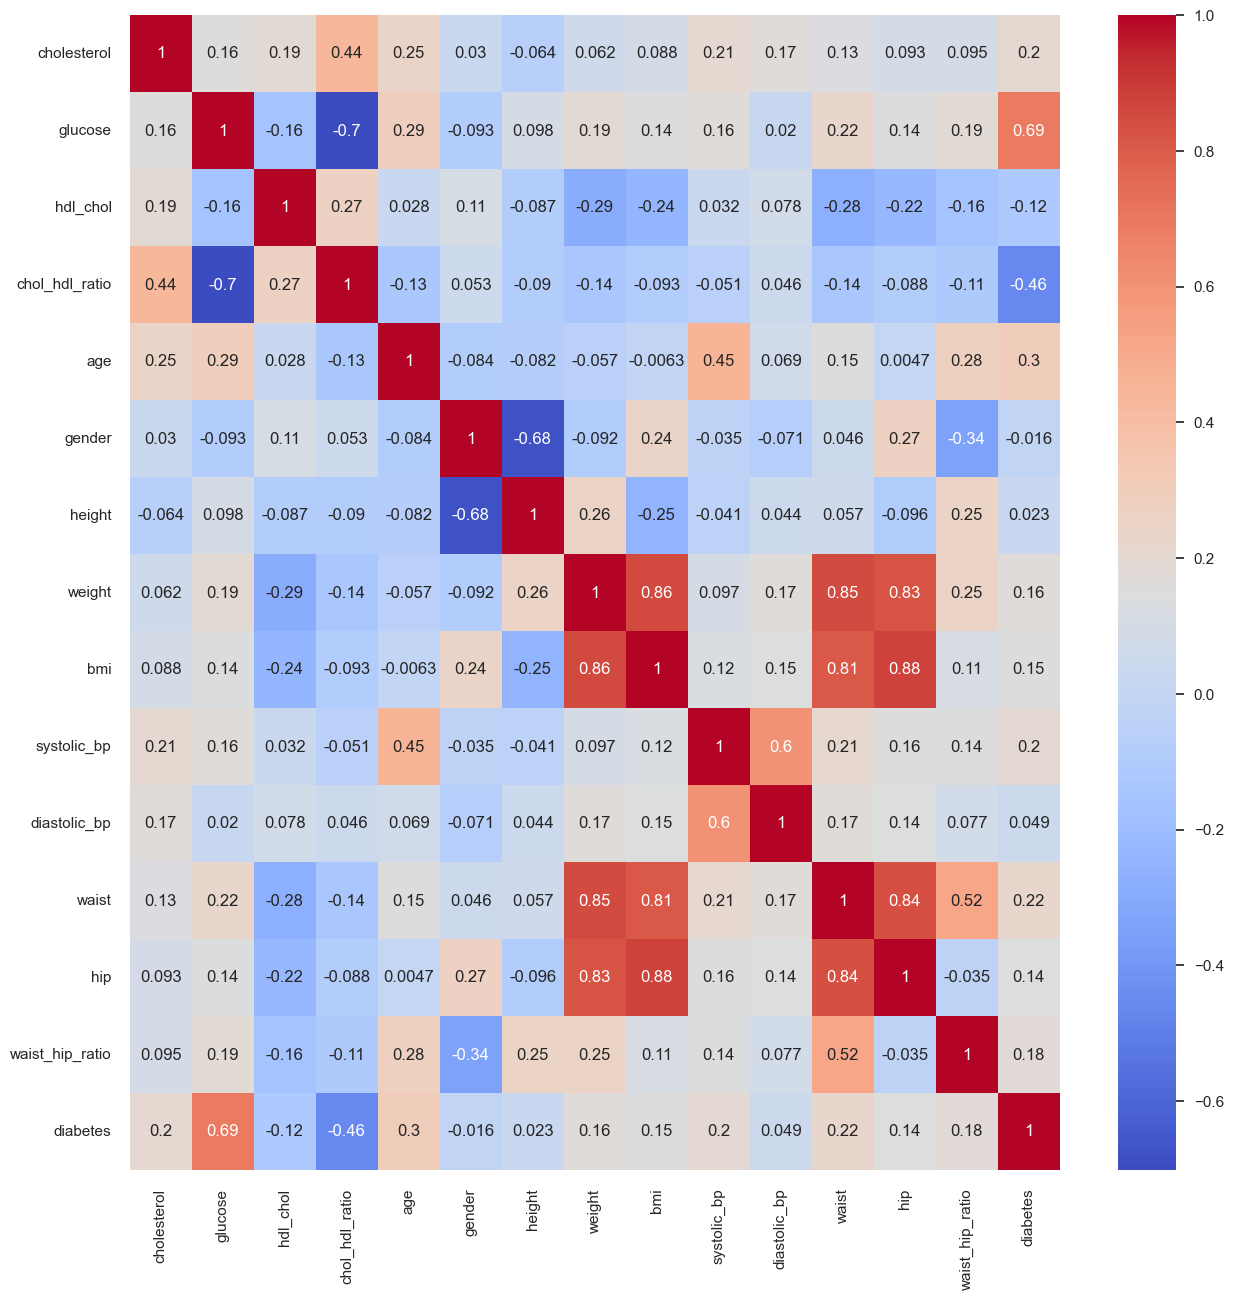

In [48]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap ='coolwarm')
#plt.savefig('correlation.png')

## Compare the pairwise of all features

In [12]:
# sns.pairplot(data=df,hue='gender')
# plt.savefig('pairplot.png')

## Scatter diagram of the ratio of cholesterol to glucose by sex 

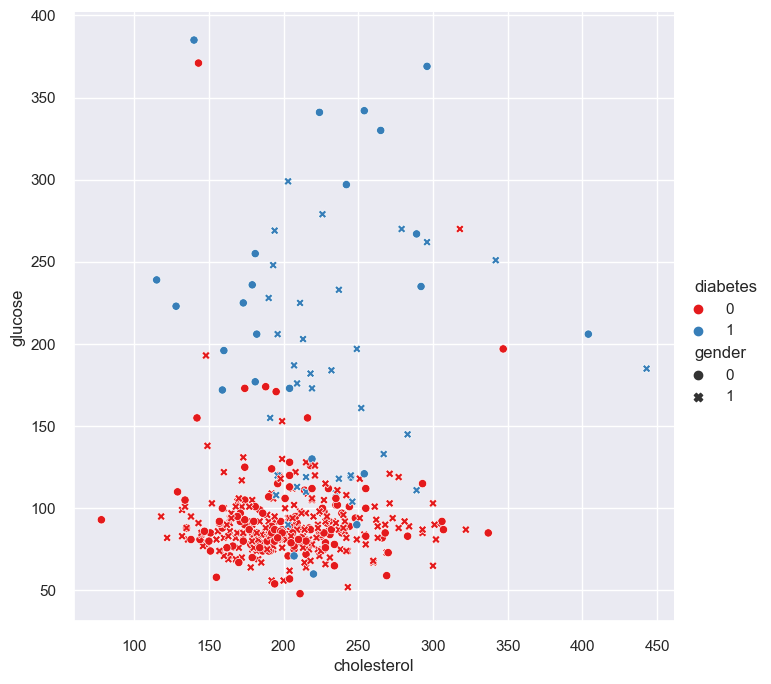

In [49]:
sns.relplot(x="cholesterol",
            y="glucose",
            style='gender',
            hue="diabetes", # added to color axis
            data=df,
            height=7,
            palette="Set1" # change color palette 
        )
# plt.savefig('scatter chol-glucose.png')

## Scatter diagram of the ratio of weight to bmi by sex and either Healthy or not

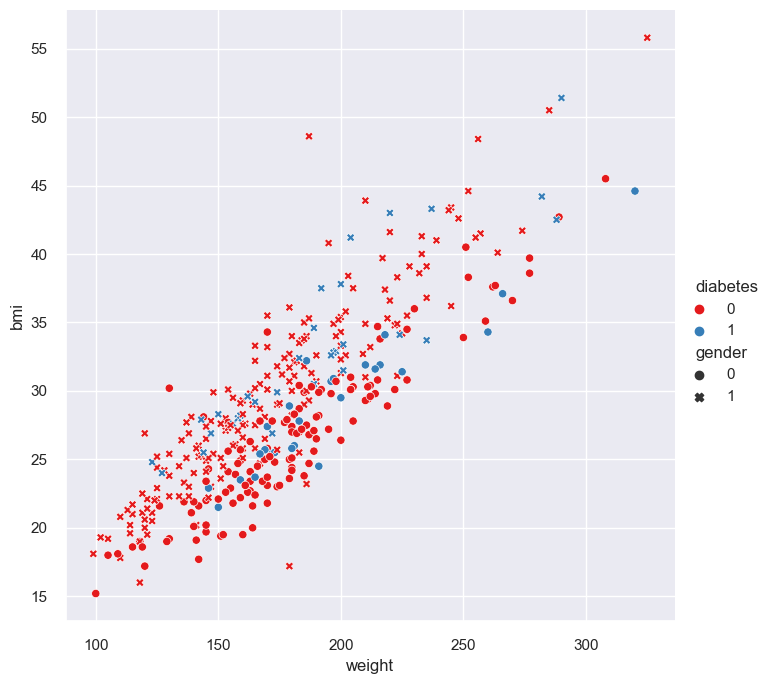

In [50]:
sns.relplot(x='weight',
            y="bmi",
            style='gender',
            hue="diabetes", # added to color axis
            data=df,
            height=7,
            palette="Set1" # change color palette 
            )
# #plt.savefig('scatter wight-bmi.png')

In [15]:
# ax = df[df['gender'] == 'female'][0:100].plot(kind='scatter', x='weight', y='bmi', color='DarkBlue', label='Female');
# df[df['gender'] == 'male'][0:100].plot(kind='scatter', x='weight', y='bmi', color='Yellow', label='Male', ax=ax);


## Graph of age of people and patients or being healthy by sex, where the number 1 means sick and 0 is healthy  

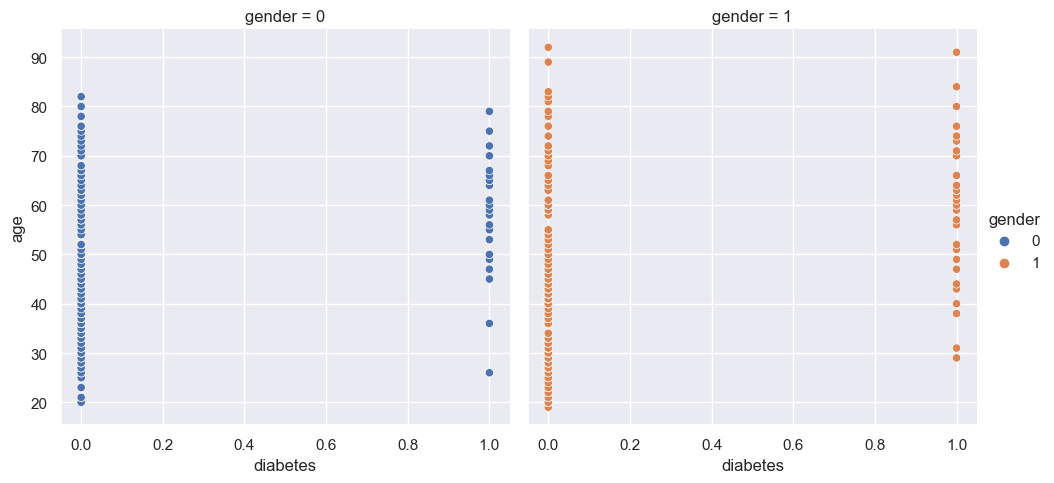

In [7]:
sns.relplot(x='diabetes',y='age',col='gender',hue='gender',data=df,kind='scatter')
# plt.savefig('scatter age-diabet.png')

## Cholesterol Histogram

In [10]:
# sns.distplot(df['cholesterol'])
# plt.title('cholesterol')
# # # plt.savefig('histo chol.png')

In [8]:
# df.columns

In [9]:
# cols = ['cholesterol', 'glucose', 'hdl_chol','chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi','systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio']

In [10]:
# for col in cols:
    # df[col].mask(np.random.random(df[col].shape) <= 0.1 , inplace= True)
# df

# Data Summary

In [11]:
df.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,207.230769,107.338462,50.266667,2.187667,46.774359,0.584615,65.951282,177.407692,28.785897,137.133333,83.289744,37.869231,42.992308,0.881171,0.153846
std,44.666005,53.798188,17.279069,0.732801,16.435911,0.493421,3.918867,40.407824,6.616737,22.859528,13.498192,5.760947,5.664342,0.073161,0.361265
min,78.000000,48.000000,12.000000,0.360000,19.000000,0.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.681818,0.000000
25%,179.000000,81.000000,38.000000,1.752500,34.000000,0.000000,63.000000,150.250000,24.125000,122.000000,75.000000,33.000000,39.000000,0.829398,0.000000
50%,203.000000,90.000000,46.000000,2.205000,44.500000,1.000000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.879394,0.000000
75%,229.000000,107.750000,59.000000,2.580000,60.000000,1.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.926372,0.000000
max,443.000000,385.000000,120.000000,4.670000,92.000000,1.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.142857,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int64  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
 14  diabetes         390 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 45.8 KB


In [13]:
df['diabetes'].value_counts() # so in dataset target has 330 healthy and 60 diabetic

0    330
1     60
Name: diabetes, dtype: int64

In [14]:
df['gender'].value_counts()

1    228
0    162
Name: gender, dtype: int64

In [15]:
df[['diabetes','gender']].value_counts() #194 female and 136 male are healthy #34 female and 26 male are diabetic

diabetes  gender
0         1         194
          0         136
1         1          34
          0          26
dtype: int64

# Preprocessing

# Outlier Analysis

In [26]:
# f, ax = plt.subplots(figsize=(8,8))
# ax = sns.boxplot(data=df, orient="h", palette="Set2")
# #plt.savefig('boxplot outlieranalysis.png')

In [27]:
# columns = ["cholesterol","glucose","bmi","systolic_bp","diastolic_bp","weight","waist","hip"]
# for column in columns:
    # f, ax = plt.subplots(figsize=(5,5))
    # ax = sns.boxplot(x=column, data=df)
    # ax = sns.swarmplot(x=column, data=df, color=".25")
#     #plt.savefig('%s.png' % column)

## IQR

In [28]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
#print(IQR)

In [18]:
# lower_bound = Q1 - 1.5*IQR
# upper_bound = Q3 + 1.5*IQR

## Remove outlier

### Remove with use IQR

In [16]:
# df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [31]:
# ax = df_clean[df_clean['diabetes'] == 1][0:270].plot(kind='scatter', x='cholesterol', y='glucose', color='DarkBlue', label='Diabetic');
# df_clean[df_clean['diabetes'] == 0][0:270].plot(kind='scatter', x='cholesterol', y='glucose', color='Yellow', label='Healthy', ax=ax);
# plt.savefig('scatter chol-glucose after removing outlier.png')

In [32]:
# df_clean.shape

# Define X

In [18]:
x = df.drop(columns=['diabetes'])
x

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,193,77,49,2.51,19,1,61,119,22.5,118,70,32,38,0.842105
1,146,79,41,1.85,19,1,60,135,26.4,108,58,33,40,0.825000
2,217,75,54,2.89,20,1,67,187,29.3,110,72,40,45,0.888889
3,226,97,70,2.33,20,1,64,114,19.6,122,64,31,39,0.794872
4,164,91,67,1.80,20,1,70,141,20.2,122,86,32,39,0.820513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,2.16,83,1,59,125,25.2,150,90,35,40,0.875000
386,226,279,52,0.81,84,1,60,192,37.5,144,88,41,48,0.854167
387,301,90,118,3.34,89,1,61,115,21.7,218,90,31,41,0.756098
388,232,184,114,1.26,91,1,61,127,24.0,170,82,35,38,0.921053


In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cholesterol      390 non-null    int64  
 1   glucose          390 non-null    int64  
 2   hdl_chol         390 non-null    int64  
 3   chol_hdl_ratio   390 non-null    float64
 4   age              390 non-null    int64  
 5   gender           390 non-null    int64  
 6   height           390 non-null    int64  
 7   weight           390 non-null    int64  
 8   bmi              390 non-null    float64
 9   systolic_bp      390 non-null    int64  
 10  diastolic_bp     390 non-null    int64  
 11  waist            390 non-null    int64  
 12  hip              390 non-null    int64  
 13  waist_hip_ratio  390 non-null    float64
dtypes: float64(3), int64(11)
memory usage: 42.8 KB


# Define Y

In [20]:
y = df['diabetes']
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

# Normalization

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
df.columns

Index(['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age', 'gender',
       'height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist',
       'hip', 'waist_hip_ratio', 'diabetes'],
      dtype='object')

In [23]:
# remove binary columns from datfarme to scaling
cols_to_scale = ['cholesterol', 'glucose', 'hdl_chol', 'chol_hdl_ratio', 'age','height', 'weight', 'bmi', 'systolic_bp', 'diastolic_bp', 'waist',
                 'hip', 'waist_hip_ratio']

scaler = StandardScaler()
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
x.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,-0.319013,-0.564655,-0.073401,0.440430,-1.692029,1,-1.265070,-1.447312,-0.951220,-0.838071,-0.985822,-1.020105,-0.882489,-0.534653
1,-1.372619,-0.527432,-0.536983,-0.461381,-1.692029,1,-1.520574,-1.050840,-0.361048,-1.276087,-1.875972,-0.846299,-0.528950,-0.768756
2,0.218998,-0.601879,0.216339,0.959654,-1.631108,1,0.267951,0.237692,0.077797,-1.188484,-0.837464,0.370339,0.354899,0.105627
3,0.420753,-0.192418,1.143504,0.194481,-1.631108,1,-0.498560,-1.571209,-1.390065,-0.662865,-1.430897,-1.193910,-0.705719,-1.181090
4,-0.969111,-0.304089,0.969660,-0.529700,-1.631108,1,1.034462,-0.902163,-1.299270,-0.662865,0.201045,-1.020105,-0.705719,-0.830167


# Feature Selection Methods


1 - Filter based

1-1 Chi2

In [105]:
# from sklearn.feature_selection import SelectKBest, chi2
# selector = SelectKBest(score_func = chi2, k = 14)
# selector.fit(x, y)
# x.columns[selector.get_support()]

1-2 ANOVA F-value

In [24]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

k = 5  # Number of top features to select
selector = SelectKBest(score_func = f_classif, k = k)
X_selected = selector.fit(x, y)# Select the top k features

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)
selected_features = x.columns[feature_indices]

X_selected = x.iloc[:, feature_indices]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
etc_model = ExtraTreesClassifier()  # Choose your desired classifier
etc_model.fit(X_train, y_train)
y_pred = etc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8974358974358975


2- Wrapper

2-1 Forward selection

In [25]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [26]:
SFS_Forward = SequentialFeatureSelector(estimator=LogisticRegression(), 
                                        n_features_to_select = 5, 
                                        direction ='forward'
                                        )
X_selected = SFS_Forward.fit(x, y)
# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)
selected_features = x.columns[feature_indices]

X_selected = x.iloc[:, feature_indices]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = ExtraTreesClassifier()  # Choose your desired classifier
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8974358974358975


2-2 Backward selection

In [27]:
dtc1 = DecisionTreeClassifier()
SFS_Backward = SequentialFeatureSelector(estimator=dtc1, 
                                         n_features_to_select = 5, 
                                         direction ='backward'
                                         )
X_selected = SFS_Backward.fit(x, y)
# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)
selected_features = x.columns[feature_indices]

X_selected = x.iloc[:, feature_indices]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
etc_model = ExtraTreesClassifier()  # Choose your desired classifier
etc_model.fit(X_train, y_train)
y_pred = etc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9102564102564102


2-3 Recursive Feature Elimination (RFE)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression# #Selecting the Best important features according to Logistic Regression
rfe_selector = RFE(estimator=LogisticRegression(),
                   n_features_to_select = 5)
X_selected = rfe_selector.fit(x, y)
# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)
selected_features = x.columns[feature_indices]

X_selected = x.iloc[:, feature_indices]


X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
model = ExtraTreesClassifier()  # Choose your desired classifier
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8846153846153846


3 - Embedding

In [29]:
from sklearn.linear_model import RidgeCV, LassoCV

In [30]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 0.015255
Best score using built-in LassoCV: 0.490817


In [31]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 8 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

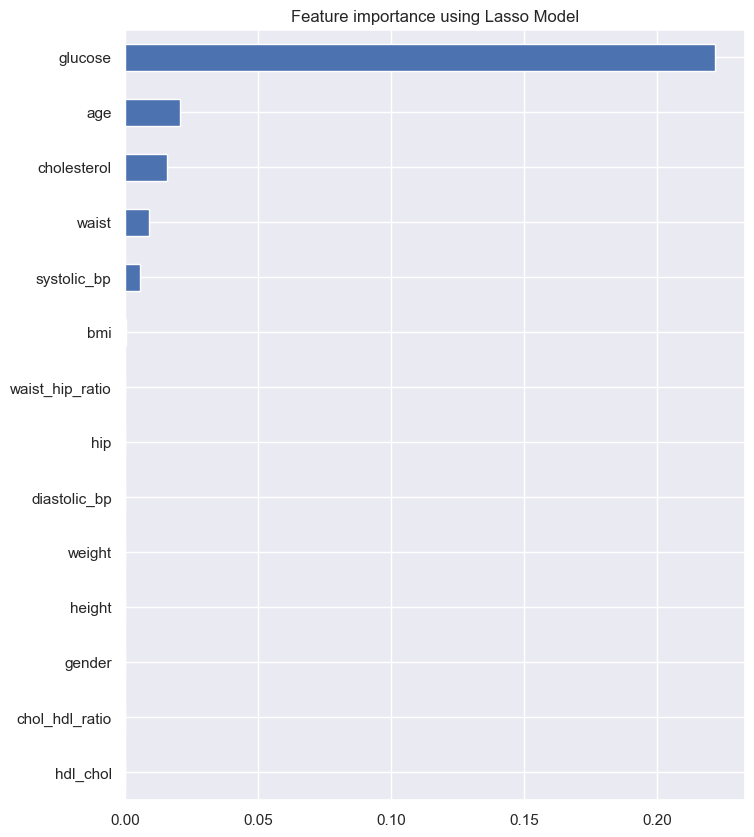

In [32]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [35]:
imp_coef

hdl_chol          -0.000000
chol_hdl_ratio    -0.000000
gender             0.000000
height            -0.000000
weight             0.000000
diastolic_bp       0.000000
hip                0.000000
waist_hip_ratio    0.000000
bmi                0.000500
systolic_bp        0.005699
waist              0.009211
cholesterol        0.015839
age                0.020534
glucose            0.221772
dtype: float64

4 - Other method

4-1 rfecv

In [52]:
from sklearn.ensemble import RandomForestClassifier
# !pip install yellowbrick
from yellowbrick.model_selection import rfecv

In [53]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

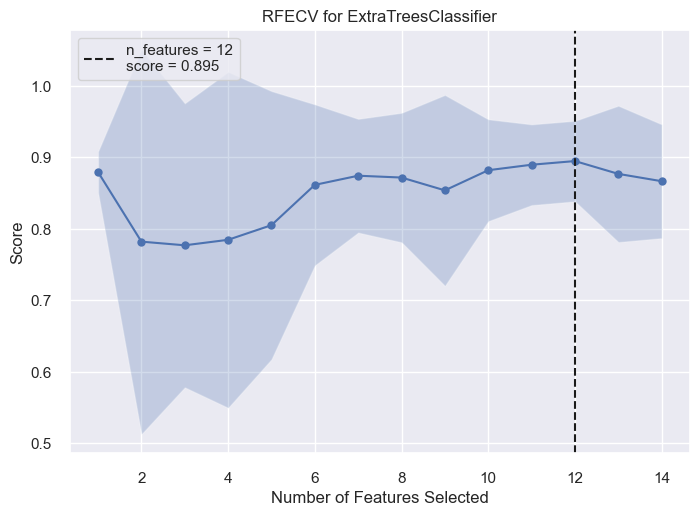

In [55]:
visualize = rfecv(ExtraTreesClassifier(), X=x, y=y, min_features_to_select = 5)

4-2 Correlation Matrix with Heatmap

In [41]:
import seaborn as sns

<Axes: >

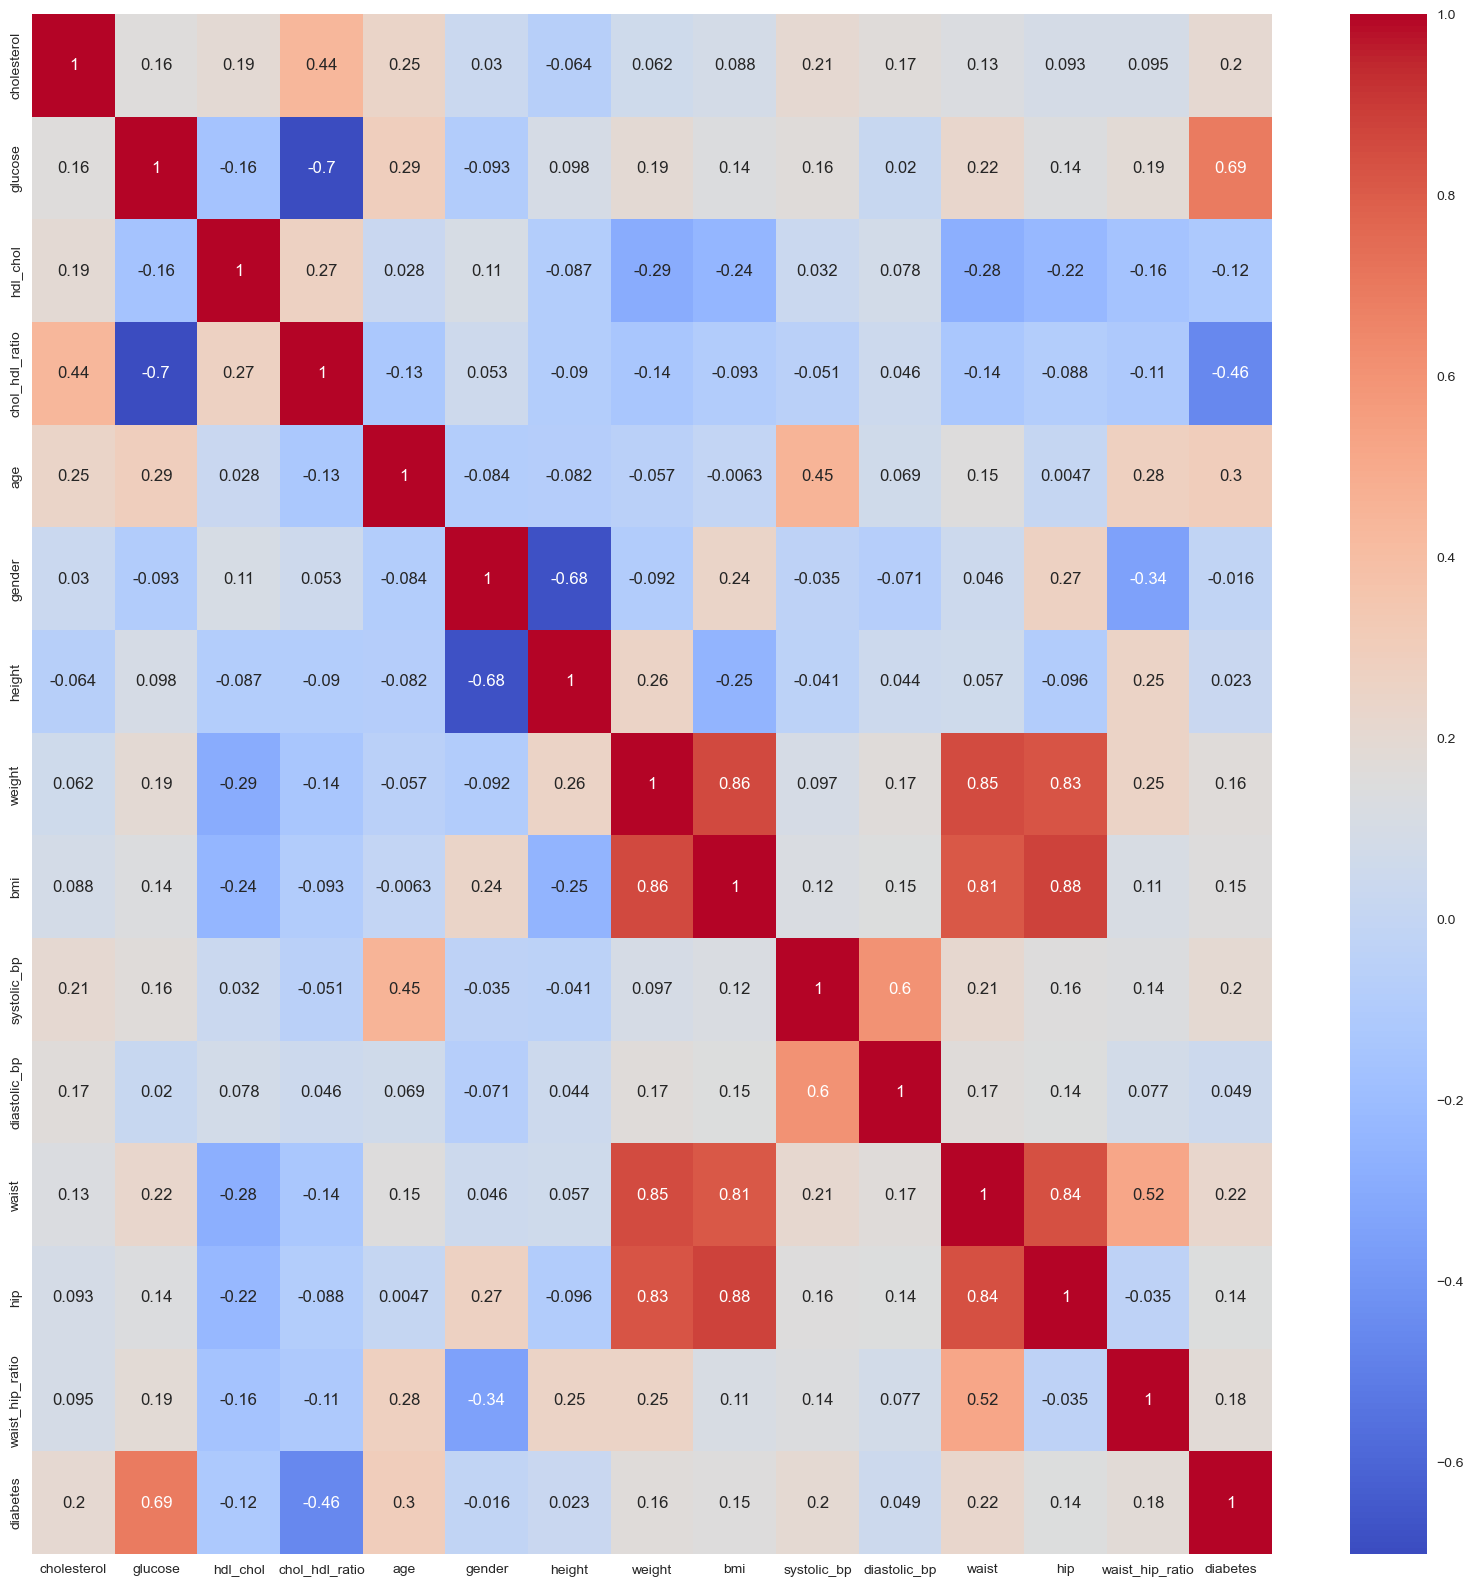

In [42]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')

4-3 Feature Importance

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
etc_model = ExtraTreesClassifier(n_estimators=5)
etc_model.fit(x,y)
print(etc_model.feature_importances_)

[0.0401318  0.39569966 0.04025989 0.13383186 0.06350034 0.01329837
 0.02861505 0.037069   0.04148117 0.0508525  0.03199652 0.03510857
 0.04676243 0.04139284]


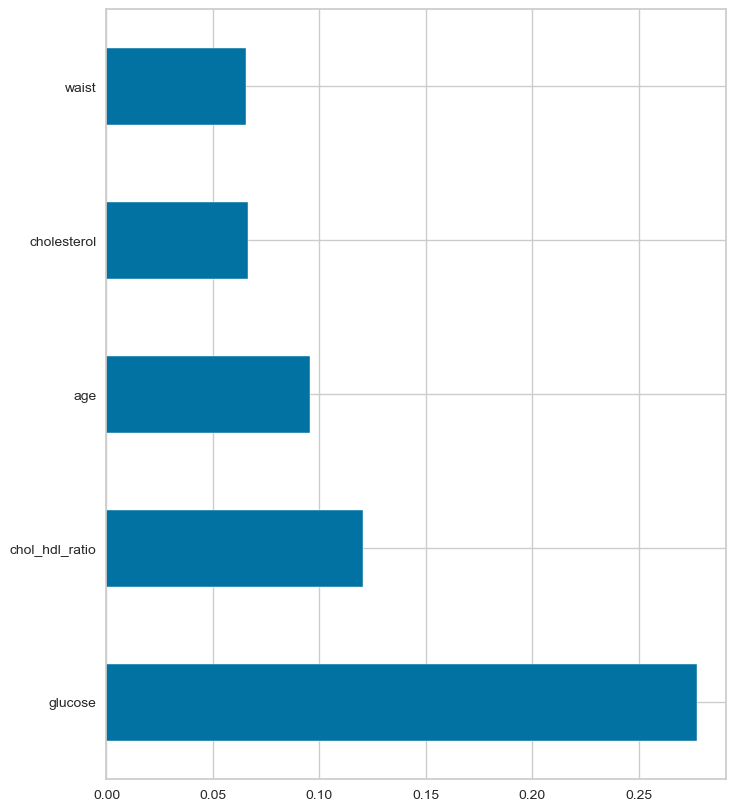

In [158]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(etc_model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Oversampling

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_1 ,y_1 = smote.fit_resample(x, y)
x_smote ,x_test ,y_smote ,y_test = train_test_split(x_1, y_1 ,test_size =.3,random_state = 42)

In [57]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x_1 ,y_1 = smote.fit_resample(x, y)
print(x_1.shape)
print(y_1.shape)

(660, 14)
(660,)


In [58]:
from collections import Counter
Counter1 = Counter(y)
print('count of class label before smoting',Counter1)
Counter2 = Counter(y_1)
print('count of class label after smoting',Counter2)

count of class label before smoting Counter({0: 330, 1: 60})
count of class label after smoting Counter({0: 330, 1: 330})


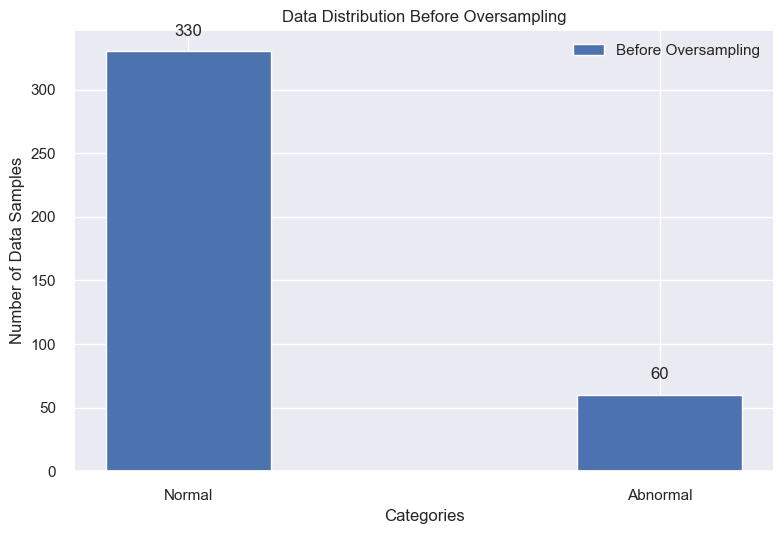

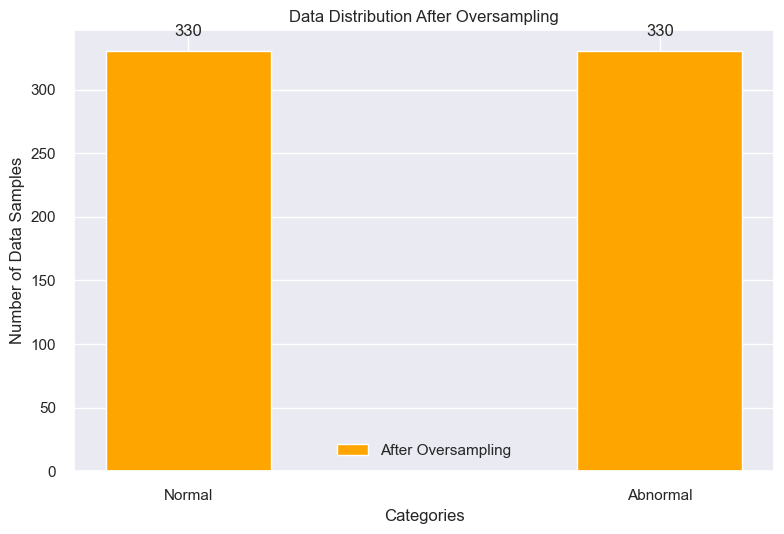

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Categories (classes) in your data
categories = ['Normal', 'Abnormal']

# Number of data samples before oversampling
data_before_oversampling = [330, 60]  # Replace with your actual counts before oversampling

# Number of data samples after oversampling
data_after_oversampling = [330, 330]  # Replace with your actual counts after oversampling

# X-axis positions for categories
x_positions = np.arange(len(categories))

# Width of each bar
bar_width = 0.35

# Create the first bar chart for "Before Oversampling"
plt.bar(x_positions, data_before_oversampling, width=bar_width, label='Before Oversampling')

# Add data annotations on the first bars
for i, count in enumerate(data_before_oversampling):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Add labels and title for the first bar chart
plt.xlabel('Categories')
plt.ylabel('Number of Data Samples')
plt.title('Data Distribution Before Oversampling')
plt.xticks(x_positions, categories)
plt.legend()

# Show the first plot
plt.tight_layout()
plt.show()

# Create the second bar chart for "After Oversampling"
plt.bar(x_positions, data_after_oversampling, width=bar_width, label='After Oversampling', color='orange')

# Add data annotations on the second bars
for i, count in enumerate(data_after_oversampling):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

# Add labels and title for the second bar chart
plt.xlabel('Categories')
plt.ylabel('Number of Data Samples')
plt.title('Data Distribution After Oversampling')
plt.xticks(x_positions, categories)
plt.legend()

# Show the second plot
plt.tight_layout()
plt.show()


# Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
x_smote ,x_test ,y_smote ,y_test = train_test_split(x_1, y_1 ,test_size =.3,random_state = 42)

In [76]:
print('train set shape:',x_smote.shape, y_smote.shape)
print('test set shape:',x_test.shape, y_test.shape)

train set shape: (462, 14) (462,)
test set shape: (198, 14) (198,)


In [77]:
from collections import Counter
print('Training target statistics: ',Counter(y_smote))
print('Testing target statistics: ',Counter(y_test))

Training target statistics:  Counter({1: 244, 0: 218})
Testing target statistics:  Counter({0: 112, 1: 86})


# Classification

## Lazy predict
* The lazypredict library in Python provides a convenient way to quickly evaluate and compare the performance of multiple machine learning models without explicitly training and tuning each model separately. It automatically runs and evaluates a wide range of classifiers and regressors on your dataset

In [52]:
import lazypredict
from lazypredict.Supervised import LazyClassifier


In [53]:
lazy_clf = LazyClassifier(verbose=0,
                          ignore_warnings=True,
                          custom_metric=None)
models, predictions = lazy_clf.fit(x_smote,
                                   x_test,
                                   y_smote,
                                   y_test)
print(models)

100%|██████████| 29/29 [00:01<00:00, 14.53it/s]

[LightGBM] [Info] Number of positive: 244, number of negative: 218
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1496
[LightGBM] [Info] Number of data points in the train set: 462, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.528139 -> initscore=0.112673
[LightGBM] [Info] Start training from score 0.112673
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

# Extra tree Classifier

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Create a k-fold cross-validation object
etc_kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for grid search
etc_param_grid = {
    'criterion':['gini','entropy'],
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Create the ExtraTreesClassifier
etc = ExtraTreesClassifier()

# Create a GridSearchCV object
etc_grid_search = GridSearchCV(estimator=etc, param_grid=etc_param_grid, cv=etc_kfold)

# Fit the GridSearchCV object to the data
etc_grid_search.fit(x_smote, y_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [80]:
# Print the best parameters and best score
print("Best Parameters:", etc_grid_search.best_params_)
print("Best Score:", etc_grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9567087424029921


In [81]:
etc_grid_search.best_estimator_

ExtraTreesClassifier(criterion='entropy', min_samples_split=5, n_estimators=200)

In [82]:
etc_criterion = etc_grid_search.best_params_['criterion']
etc_max_depth = etc_grid_search.best_params_['max_depth']
etc_min_samples_split = etc_grid_search.best_params_['min_samples_split']
etc_n_estimators = etc_grid_search.best_params_['n_estimators']

In [83]:
from sklearn.model_selection import cross_val_score
etc_cv_scores = cross_val_score(etc, x_smote, y_smote, cv=etc_kfold)
etc_cv_scores.mean()

0.9523842917251052

In [84]:
best_etc = ExtraTreesClassifier(n_estimators=etc_n_estimators,
                                criterion=etc_criterion,
                                max_depth=etc_max_depth,
                                min_samples_split=etc_min_samples_split
                                )
best_etc = best_etc.fit(x_smote,y_smote)
print(best_etc.score(x,y))

0.9871794871794872


In [85]:
etc_y_hat = best_etc.predict(x_test)
# print('y predict is: ',knn_y_hat)
# print('y test is: ',y_test)

In [86]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote,best_etc.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,etc_y_hat))

train set accuracy is: 1.0
test set accuracy is: 0.9747474747474747


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,etc_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.95      1.00      0.97        86

    accuracy                           0.97       198
   macro avg       0.97      0.98      0.97       198
weighted avg       0.98      0.97      0.97       198



Text(0.5, 77.24999999999999, 'Predicted')

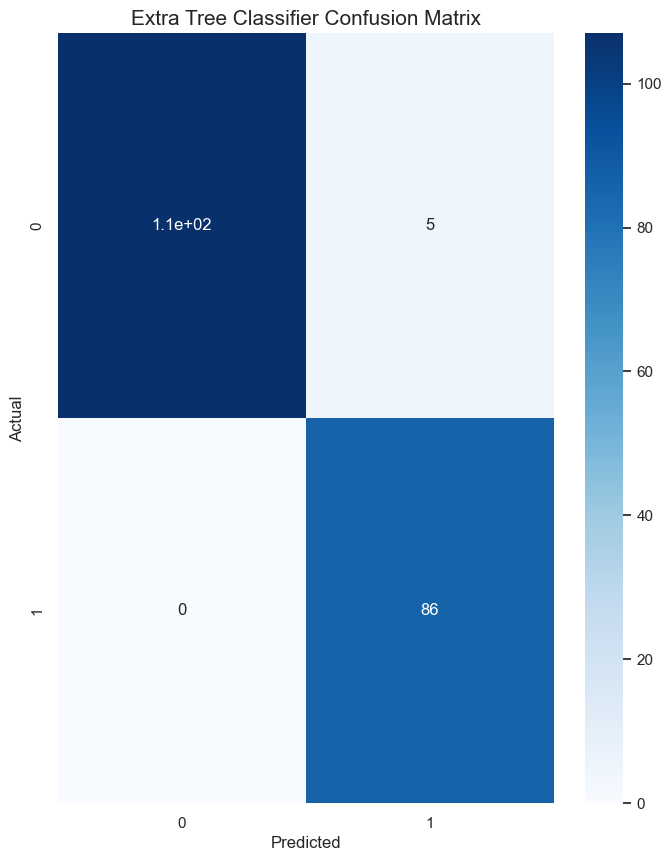

In [88]:
from sklearn.metrics import confusion_matrix
etc_conf_matrix = confusion_matrix(y_test,etc_y_hat)
sns.heatmap(etc_conf_matrix,annot=True,cmap='Blues')
plt.title('Extra Tree Classifier Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('KNN conf matrix.png')

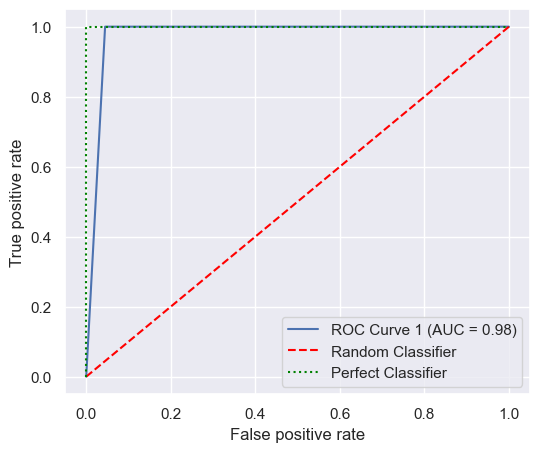

In [89]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, etc_y_hat)
auc = roc_auc_score(y_test, etc_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('KNN AUC ROC.png')

# Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [91]:
rf_kfold = KFold(n_splits=5, random_state=7,shuffle=True)

In [92]:
rf = RandomForestClassifier()

In [93]:
rf_grid_params= {
    'n_estimators':range(1,50),
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split': [2, 5, 10]
    }

In [94]:
rf_gs = GridSearchCV(rf,
                     param_grid=rf_grid_params,
                     verbose = 1,
                     cv = rf_kfold,
                     n_jobs = -1)

In [95]:
rf_gs_result = rf_gs.fit(x_smote, y_smote)

Fitting 5 folds for each of 2646 candidates, totalling 13230 fits


In [96]:
rf_gs_result.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_split=5,
                       n_estimators=23)

In [97]:
rf_criterion = rf_gs_result.best_params_['criterion']
rf_max_depth = rf_gs_result.best_params_['max_depth']
rf_n_estimators = rf_gs_result.best_params_['n_estimators']
rf_min_samples_split = rf_gs_result.best_params_['min_samples_split']

In [98]:
rf_min_samples_split

5

In [99]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, x_smote, y_smote, cv=rf_kfold)
rf_cv_scores.mean()

0.9328892005610099

In [100]:
best_rf = RandomForestClassifier(n_estimators=rf_n_estimators,
                            criterion=rf_criterion,
                            max_depth=rf_max_depth,
                            min_samples_split=rf_min_samples_split
                            )
best_rf = best_rf.fit(x_smote,y_smote)
print(best_rf.score(x,y))

0.9743589743589743


In [101]:
rf_y_hat = best_rf.predict(x_test)

In [102]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
print('train set accuracy is:',accuracy_score(y_smote,best_rf.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,rf_y_hat))

train set accuracy is: 0.9913419913419913
test set accuracy is: 0.9696969696969697


In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       112
           1       0.93      1.00      0.97        86

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



Text(0.5, 77.24999999999999, 'Predicted')

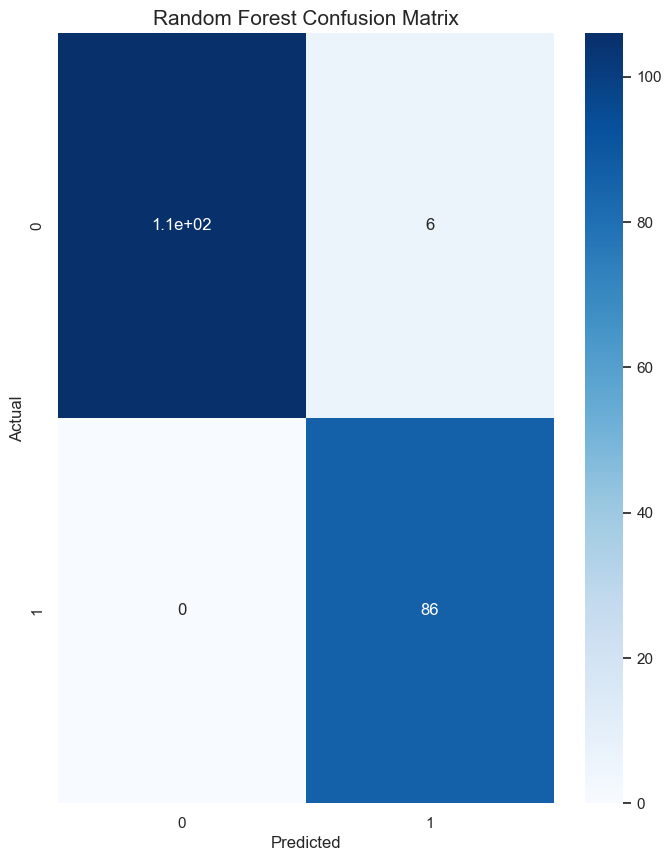

In [104]:
from sklearn.metrics import confusion_matrix
rf_conf_matrix = confusion_matrix(y_test,rf_y_hat)
sns.heatmap(rf_conf_matrix,annot=True,cmap='Blues')
plt.title('Random Forest Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('RF conf matrix.png')

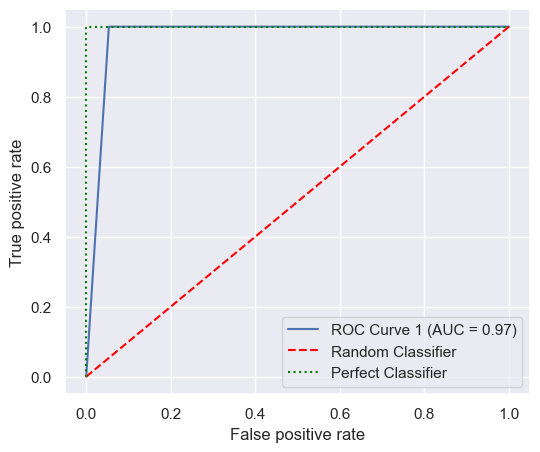

In [105]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, rf_y_hat )
auc = roc_auc_score(y_test, rf_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('RF AUC ROC.png')

Text(0, 0.5, 'Error')

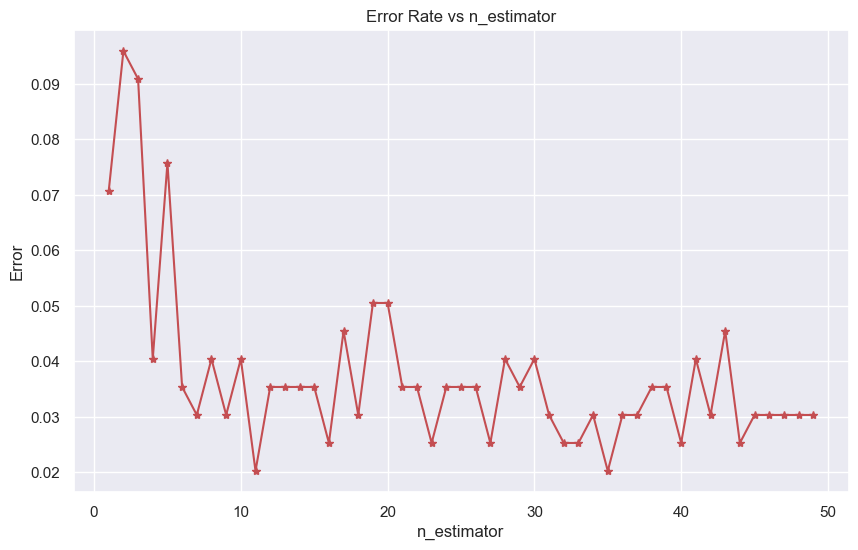

In [106]:
error_rate=[]
for i in range(1,50):
    iteration_error=[]
    best_rf=RandomForestClassifier(n_estimators=i,
                                   criterion=rf_criterion,
                                   max_depth=rf_max_depth)
    best_rf.fit(x_smote,y_smote)
    y_hat=best_rf.predict(x_test)
    iteration_error.append(np.mean(y_hat != y_test))
    error_rate.append(np.mean(iteration_error))


plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='r',marker='*')
plt.title('Error Rate vs n_estimator')
plt.xlabel('n_estimator')
plt.ylabel('Error')
# plt.savefig('RF Error.png')

# XGBoost

In [107]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold

In [108]:
from sklearn.model_selection import GridSearchCV, KFold
xgb_kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for grid search
xgb_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Create the XGBoost classifier
xgb = xgb.XGBClassifier()

# Create a GridSearchCV object
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid, cv=xgb_kfold)

# Fit the GridSearchCV object to the data
xgb_grid_search.fit(x_smote, y_smote)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     int...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 200]})

In [109]:
# Print the best parameters and best score
print("Best Parameters:", xgb_grid_search.best_params_)
print("Best Score:", xgb_grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
Best Score: 0.9393408134642357


In [110]:
xgb_best_params = {
    'max_depth': xgb_grid_search.best_params_['max_depth'],
    'learning_rate': xgb_grid_search.best_params_['learning_rate'],
    'n_estimators': xgb_grid_search.best_params_['n_estimators']
}

In [111]:
xgb_grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [112]:
xgb_learning_rate = xgb_grid_search.best_params_['learning_rate']
xgb_max_depth = xgb_grid_search.best_params_['max_depth']
xgb_n_estimators = xgb_grid_search.best_params_['n_estimators']

In [113]:
from sklearn.model_selection import cross_val_score
xgb_cv_scores = cross_val_score(xgb, x_smote, y_smote, cv=xgb_kfold)
xgb_cv_scores.mean()

0.9285413744740533

In [114]:
import xgboost as xgb
best_xgb = xgb.XGBClassifier(**xgb_best_params)

best_xgb = best_xgb.fit(x_smote,y_smote)
print(best_xgb.score(x,y))

0.982051282051282


In [115]:
xgb_y_hat = best_xgb.predict(x_test)
# print('y predict is: ',knn_y_hat)
# print('y test is: ',y_test)

In [116]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote, best_xgb.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test, xgb_y_hat))

train set accuracy is: 1.0
test set accuracy is: 0.9646464646464646


In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test, xgb_y_hat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       112
           1       0.93      0.99      0.96        86

    accuracy                           0.96       198
   macro avg       0.96      0.97      0.96       198
weighted avg       0.97      0.96      0.96       198



Text(0.5, 77.24999999999999, 'Predicted')

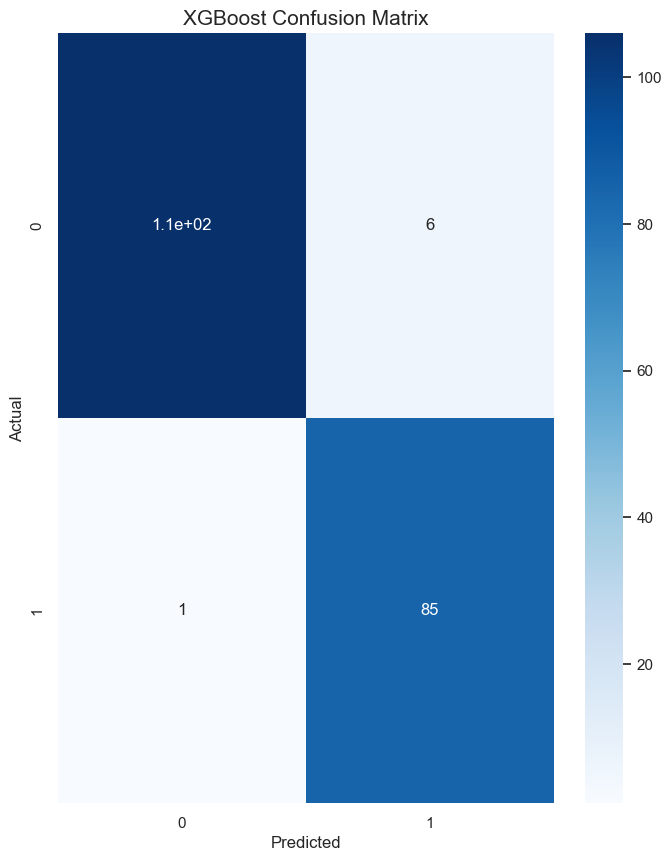

In [118]:
from sklearn.metrics import confusion_matrix
xgb_conf_matrix = confusion_matrix(y_test,xgb_y_hat)
sns.heatmap(xgb_conf_matrix,annot=True,cmap='Blues')
plt.title('XGBoost Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('KNN conf matrix.png')

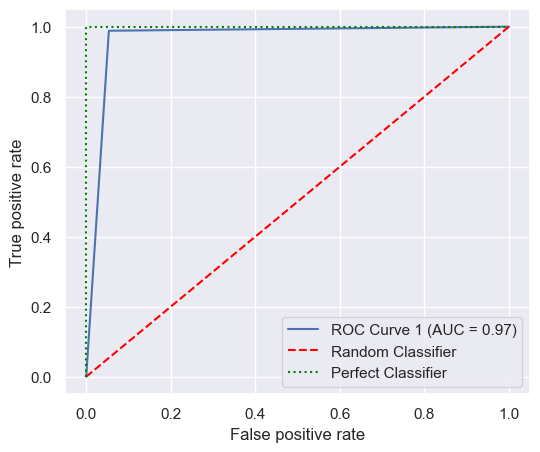

In [119]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, xgb_y_hat)
auc = roc_auc_score(y_test, xgb_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('KNN AUC ROC.png')

# Adaboost (Boosting using Adaboost)

In [120]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier

In [121]:
abc_kfold = KFold(n_splits=15, random_state=7,shuffle=True) 

In [122]:
abc_param_grid = {
              'n_estimators': range(1,50),
              'learning_rate':[.1,1],
              'algorithm':['SAMME','SAMME.R']
              }

In [123]:
abc = AdaBoostClassifier() # Create adaboost classifer object

In [124]:
# Grid Search AdaBoost Classifier
abc_gs = GridSearchCV(abc, 
                      param_grid=abc_param_grid,
                      cv=abc_kfold)
abc_gs_result = abc_gs.fit(x_smote,y_smote)

In [125]:
abc_gs_result.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 43}

In [126]:
abc_n_estimators = abc_gs_result.best_params_['n_estimators']
abc_learning_rate = abc_gs_result.best_params_['learning_rate']
abc_algorithm = abc_gs_result.best_params_['algorithm']

In [127]:
from sklearn.model_selection import cross_val_score
abc_cv_scores = cross_val_score(abc_gs, x_smote, y_smote, cv=abc_kfold)
abc_cv_scores.mean()

0.9110394265232975

In [128]:
best_abc = AdaBoostClassifier(n_estimators=abc_n_estimators,
                              learning_rate=abc_learning_rate,
                              algorithm=abc_algorithm)
best_abc.fit(x_smote,y_smote)

AdaBoostClassifier(learning_rate=1, n_estimators=43)

In [129]:
abc_y_hat = best_abc.predict(x_test)

In [130]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote,best_abc.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,abc_y_hat))

train set accuracy is: 0.9848484848484849
test set accuracy is: 0.9545454545454546


In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test,abc_y_hat))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       112
           1       0.92      0.98      0.95        86

    accuracy                           0.95       198
   macro avg       0.95      0.96      0.95       198
weighted avg       0.96      0.95      0.95       198



Text(0.5, 77.24999999999999, 'Predicted')

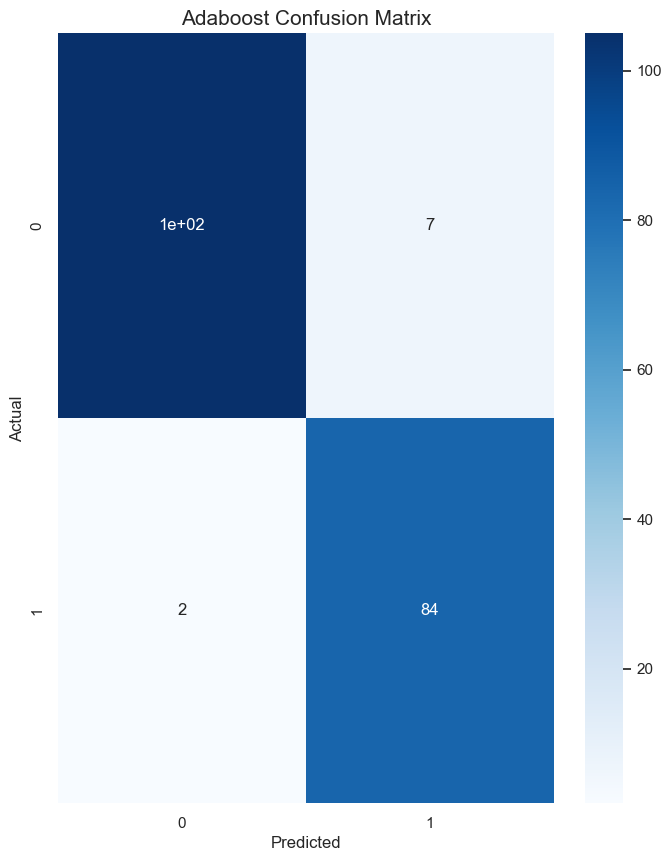

In [132]:
from sklearn.metrics import confusion_matrix
abc_conf_matrix = confusion_matrix(y_test,abc_y_hat)
sns.heatmap(abc_conf_matrix,annot=True,cmap='Blues')
plt.title('Adaboost Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('Boosting conf matrix.png')

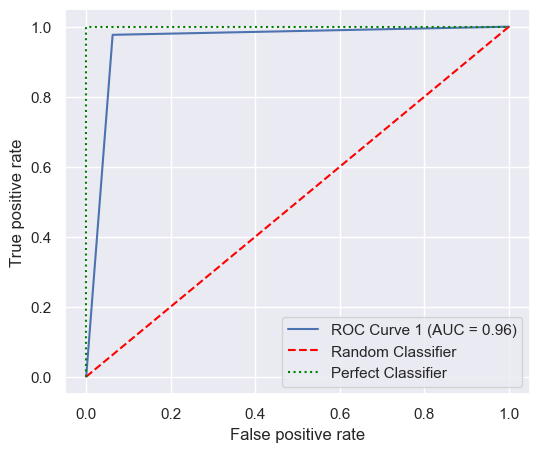

In [133]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, abc_y_hat )
auc = roc_auc_score(y_test, abc_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('Boosting AUC ROC.png')

Text(0, 0.5, 'Error')

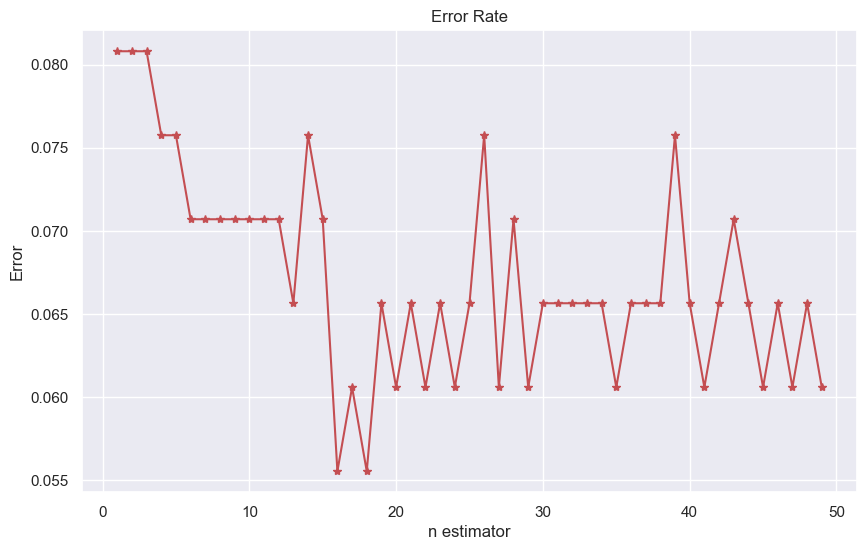

In [ ]:
error = []
for i in range(1,50):
    iteration_error = []
    abc = AdaBoostClassifier(n_estimators=i,
                             learning_rate=abc_learning_rate,
                             algorithm=abc_algorithm)
    abc.fit(x_smote,y_smote)
    abc_y_hat = abc.predict(x_test)
    iteration_error.append(np.mean(abc_y_hat != y_test))
    error.append(np.mean(iteration_error))
    
plt.figure(figsize=(10,6))    
plt.plot(range(1,50),error,color='r',marker='*')
plt.title('Error Rate')
plt.xlabel('n estimator')
plt.ylabel('Error')
# plt.savefig('Boosting Error.png')

# SVM

In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

In [135]:
svm_param_grid = { 'C':[0.1,1,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             }

In [136]:
svm_kfold = KFold(n_splits=5, random_state=7,shuffle=True)

In [137]:
svm = SVC()

In [138]:
svm_grid_search = GridSearchCV(svm, 
                               param_grid=svm_param_grid, 
                               cv=svm_kfold, 
                               scoring='accuracy')
svm_grid_search.fit(x_smote,y_smote)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']},
             scoring='accuracy')

In [139]:
print("Best parameters: ", svm_grid_search.best_params_)
print("Best score: ", svm_grid_search.best_score_)

Best parameters:  {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Best score:  0.9436418887330527


In [140]:
# Use the best hyperparameters to train a model
svc_best_params = svm_grid_search.best_params_
svm_best = SVC(**svc_best_params)
svm_best.fit(x_smote,y_smote)

SVC(C=100, degree=1, gamma=1)

In [141]:
# Evaluate the model using k-fold cross-validation
from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(svm_best, x_smote, y_smote, cv=svm_kfold, scoring='accuracy')
print("Mean accuracy: ", svm_scores.mean())

Mean accuracy:  0.9436418887330527


In [142]:
svm_y_hat = svm_best.predict(x_test)
# print('y predict is: ',y_hat)
# print('y test is: ',y_test)

In [143]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote,svm_best.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,y_hat))

train set accuracy is: 1.0
test set accuracy is: 0.9696969696969697


In [144]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_y_hat))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       112
           1       0.96      0.95      0.96        86

    accuracy                           0.96       198
   macro avg       0.96      0.96      0.96       198
weighted avg       0.96      0.96      0.96       198



Text(0.5, 77.24999999999999, 'Predicted')

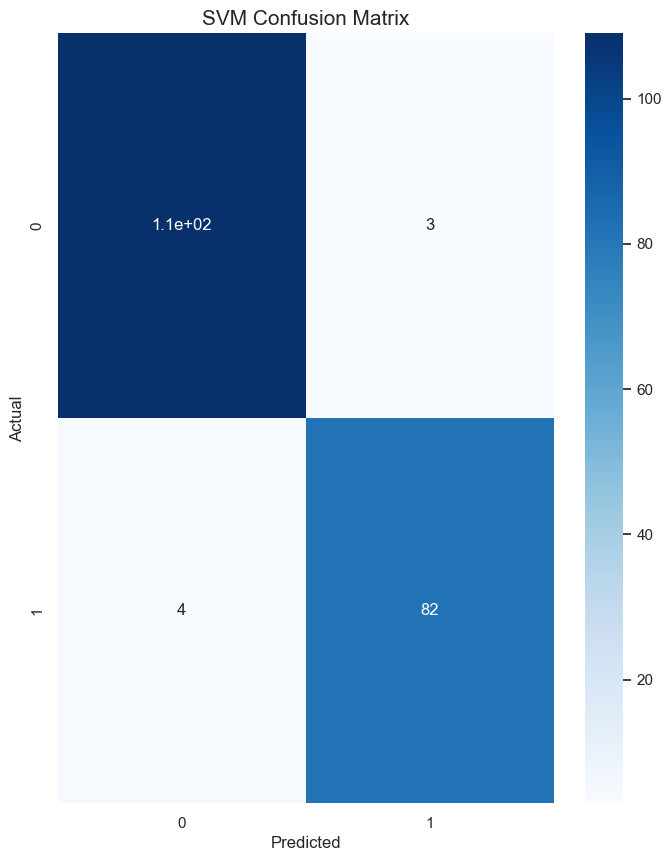

In [145]:
from sklearn.metrics import confusion_matrix
svm_conf_matrix = confusion_matrix(y_test,svm_y_hat)
sns.heatmap(svm_conf_matrix,annot=True,cmap='Blues')
plt.title('SVM Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('SVM conf matrix.png')

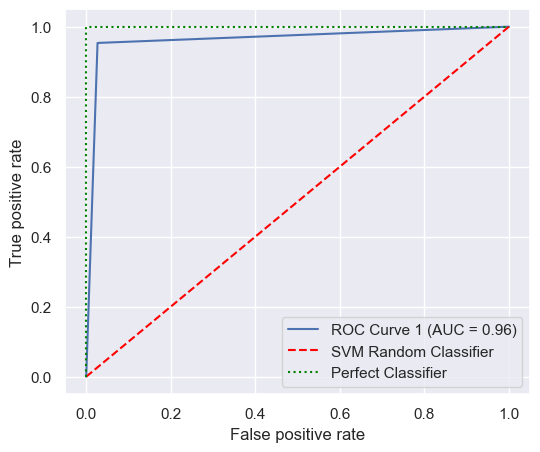

In [146]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, svm_y_hat )
auc = roc_auc_score(y_test, svm_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='SVM Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('SVM AUC ROC.png')

## K-Nearest Neighbor (KNN)

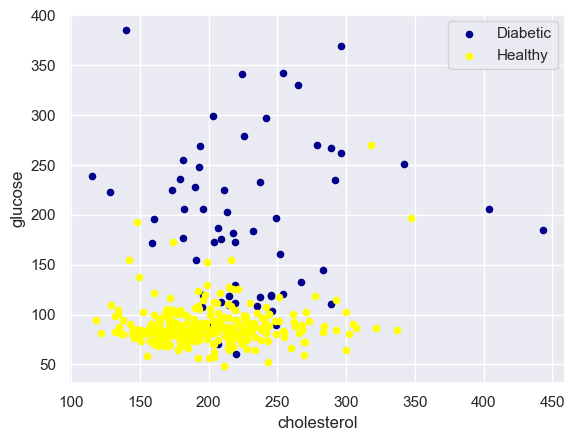

In [ ]:
ax = df[df['diabetes'] == 1][0:270].plot(kind='scatter', x='cholesterol', y='glucose', color='DarkBlue', label='Diabetic');
df[df['diabetes'] == 0][0:270].plot(kind='scatter', x='cholesterol', y='glucose', color='Yellow', label='Healthy', ax=ax);
# plt.savefig('scatter chol-glucose before removing outlier.png')

# Grid Search and KFold

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
knn_kfold = KFold(n_splits=5, 
              random_state=7,
              shuffle=True)

In [ ]:
#create new a knn model
knn = KNeighborsClassifier()

In [ ]:
#create a dictionary of all values we want to test for n_neighbors
knn_grid_params= {
    'n_neighbors':[i for i in range(1,40)],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan','chebyshev']
}

In [ ]:
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, knn_grid_params, cv=knn_kfold, scoring='accuracy')

In [ ]:
#fit model to training data
knn_gs_result = knn_gs.fit(x_smote, y_smote)

In [ ]:
knn_metric = knn_gs_result.best_params_['metric']
knn_n_neighbors = knn_gs_result.best_params_['n_neighbors']
knn_weights = knn_gs_result.best_params_['weights']

In [ ]:
knn_gs_result.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
knn_cv_scores = cross_val_score(knn, x_smote, y_smote, cv=knn_kfold)
knn_cv_scores.mean()

0.8960495558672277

# Train

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=knn_n_neighbors,
                           weights=knn_weights,
                           metric=knn_metric)
best_knn = best_knn.fit(x_smote,y_smote)
print(best_knn.score(x,y))

0.9538461538461539


# Predict

In [ ]:
knn_y_hat = best_knn.predict(x_test)
# print('y predict is: ',knn_y_hat)
# print('y test is: ',y_test)

# Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote,best_knn.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,knn_y_hat))

train set accuracy is: 1.0
test set accuracy is: 0.9090909090909091


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_y_hat))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       112
           1       0.83      1.00      0.91        86

    accuracy                           0.91       198
   macro avg       0.91      0.92      0.91       198
weighted avg       0.92      0.91      0.91       198



Text(0.5, 20.049999999999997, 'Predicted')

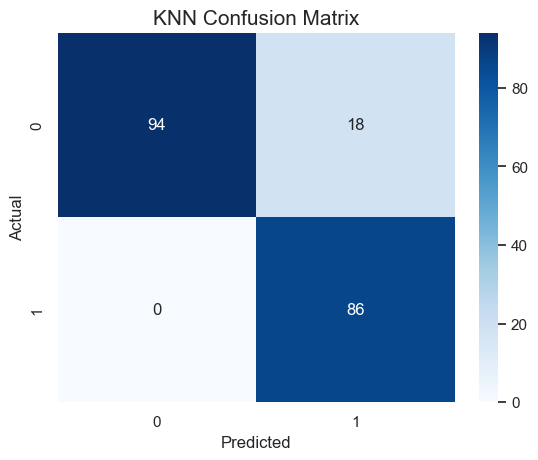

In [ ]:
from sklearn.metrics import confusion_matrix
knn_conf_matrix = confusion_matrix(y_test,knn_y_hat)
sns.heatmap(knn_conf_matrix,annot=True,cmap='Blues')
plt.title('KNN Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
# plt.savefig('KNN conf matrix.png')

# AUC & ROC

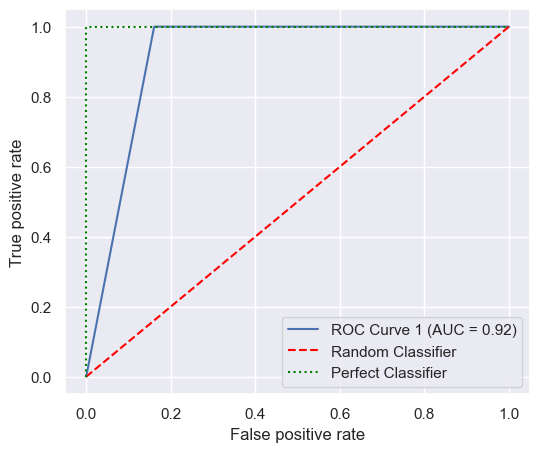

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, knn_y_hat)
auc = roc_auc_score(y_test, knn_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('KNN AUC ROC.png')

# Overfitting and Underfitting

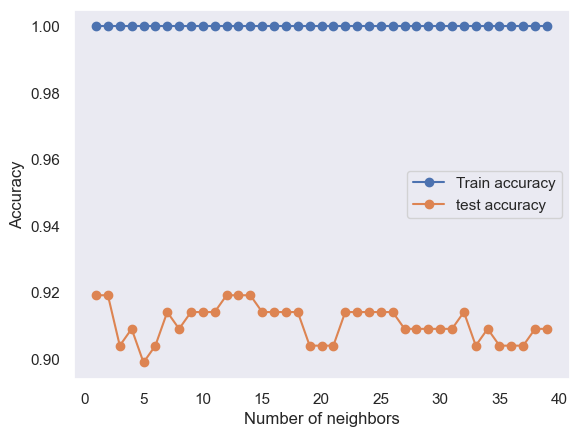

In [ ]:
neighbors= np.arange(1,40)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn_model=KNeighborsClassifier(n_neighbors=k,
                           weights=knn_weights,
                           metric=knn_metric)
    knn_model.fit(x_smote, y_smote)
    train_accuracy[i]=knn_model.score(x_smote, y_smote)
    test_accuracy[i]=knn_model.score(x_test, y_test)

    
plt.plot(neighbors, train_accuracy, label='Train accuracy', marker='o')
plt.plot(neighbors, test_accuracy, label='test accuracy', marker='o')  
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
# plt.savefig('KNN OverUnder Fitting.png')

# ERROR

Text(0, 0.5, 'Error')

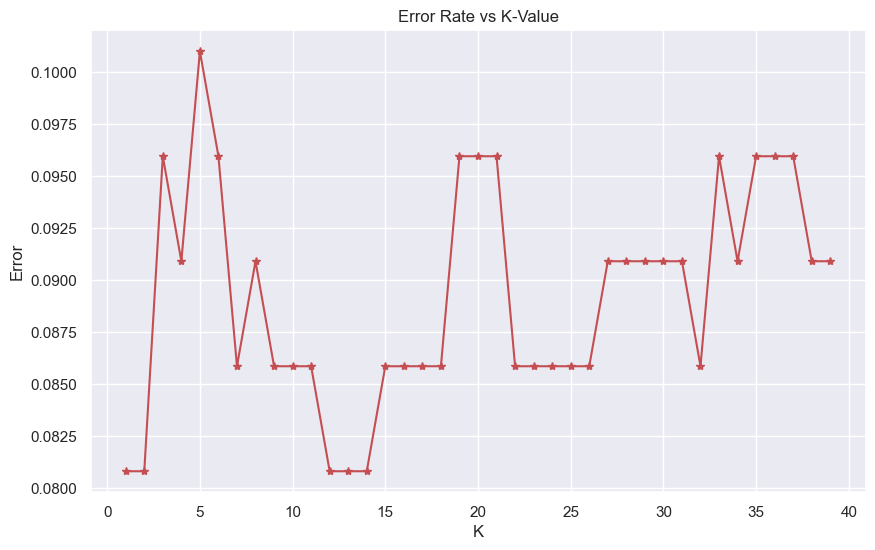

In [ ]:
error = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,
                           weights=knn_weights,
                           metric=knn_metric)
    knn.fit(x_smote,y_smote)
    y_hat = knn.predict(x_test)
    error.append(np.mean(y_hat != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='r',marker='*')
plt.title('Error Rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error')
#plt.savefig('KNN Error.png')

# Decision tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [167]:
dt_kfold = KFold(n_splits=5, random_state=7,shuffle=True)

In [168]:
tree = DecisionTreeClassifier()

In [150]:
dt_grid_params= {
    'criterion':['gini','entropy'],
    'max_depth':range(1,10),
    'min_samples_split':range(1,10),
    'min_samples_leaf': range(1,5),
    'max_features': range(1,10)
}

In [151]:
tree_gs = GridSearchCV(tree, 
                       param_grid=dt_grid_params, 
                       verbose = 1,
                       cv = dt_kfold, 
                       n_jobs = -1)

In [152]:
tree_gs_result = tree_gs.fit(x_smote, y_smote)

Fitting 5 folds for each of 5832 candidates, totalling 29160 fits


In [153]:
dt_criterion = tree_gs_result.best_params_['criterion']
dt_max_depth = tree_gs_result.best_params_['max_depth']
dt_min_samples_split = tree_gs_result.best_params_['min_samples_split']
dt_min_samples_leaf = tree_gs_result.best_params_['min_samples_leaf']
dt_max_features = tree_gs_result.best_params_['max_features']

In [154]:
tree_gs_result.best_estimator_

DecisionTreeClassifier(max_depth=8, max_features=4, min_samples_split=5)

In [155]:
from sklearn.model_selection import cross_val_score
dt_cv_scores = cross_val_score(tree, x_smote, y_smote, cv=dt_kfold)
dt_cv_scores.mean()

0.8852501168770454

In [156]:
best_tree = DecisionTreeClassifier(criterion = dt_criterion,
                              max_depth = dt_max_depth,
                              min_samples_split = dt_min_samples_split,
                              min_samples_leaf = dt_min_samples_leaf,
                              max_features = dt_max_features
)
best_tree = best_tree.fit(x_smote,y_smote)
print(best_tree.score(x,y))

0.9512820512820512


In [157]:
dt_y_hat = best_tree.predict(x_test)
# print('y predict is: ',dt_y_hat)
# print('y test is: ',y_test)

In [158]:
from sklearn.metrics import accuracy_score
print('train set accuracy is:',accuracy_score(y_smote,best_tree.predict(x_smote)))
print('test set accuracy is:',accuracy_score(y_test,dt_y_hat))

train set accuracy is: 0.9848484848484849
test set accuracy is: 0.9090909090909091


In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_y_hat))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       112
           1       0.88      0.92      0.90        86

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



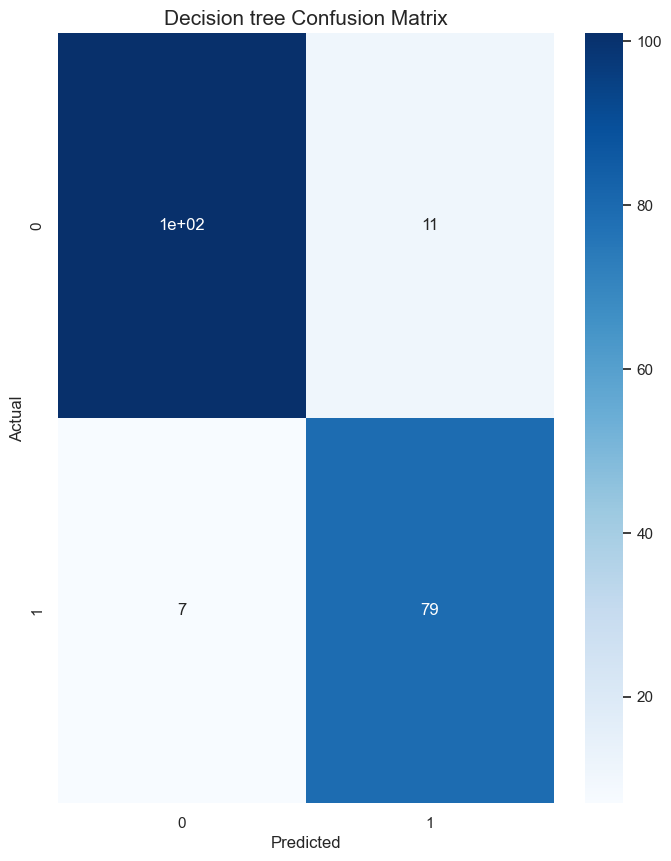

In [160]:
from sklearn.metrics import confusion_matrix
dt_conf_matrix = confusion_matrix(y_test,dt_y_hat)
sns.heatmap(dt_conf_matrix,annot=True,cmap='Blues')
plt.title('Decision tree Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('DT conf matrix.png')

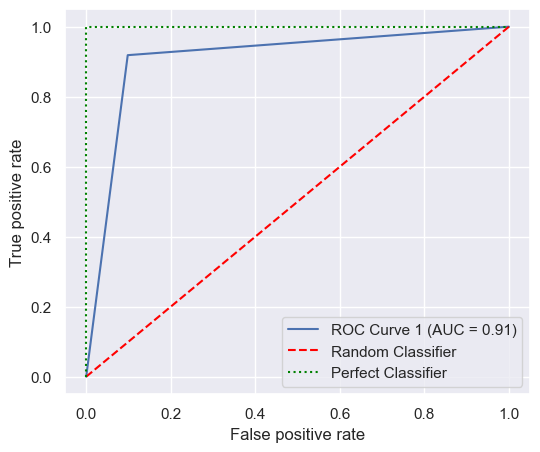

In [161]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, dt_y_hat )
auc = roc_auc_score(y_test, dt_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.savefig('DT AUC ROC.png')

In [162]:
from sklearn.tree import plot_tree
best_tree= DecisionTreeClassifier(criterion=dt_criterion, 
                                 max_depth=dt_max_depth,
                                 max_features=dt_max_features,
                                 min_samples_leaf=dt_min_samples_leaf ,
                                 min_samples_split=dt_min_samples_split)
plt.figure(figsize = (20,5))
plot_tree(best_tree, feature_names = ['cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio'],class_names = ['0','1'], filled =True, fontsize=8,rounded=True,impurity=True)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 2000x500 with 0 Axes>

# Bagging

In [169]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import cross_val_score

In [170]:
bag_kfold = KFold(n_splits=5, random_state=7,shuffle=True)
# Initialize the bagging classifier with decision Tree base
bag = BaggingClassifier()

In [171]:
bag_param_grid = {
    'n_estimators': range(1,50)
}

In [172]:
bag_gs = GridSearchCV(bag,
                      bag_param_grid,
                      cv=bag_kfold)
bag_gs_result = bag_gs.fit(x_smote, y_smote)
print(bag_gs_result)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=BaggingClassifier(),
             param_grid={'n_estimators': range(1, 50)})


In [173]:
n_estimators = bag_gs_result.best_params_['n_estimators']

In [174]:
bag_gs_result.best_estimator_

BaggingClassifier(n_estimators=48)

In [175]:
bag_gs_result.best_params_

{'n_estimators': 48}

In [176]:
bag_cv_scores = cross_val_score(bag_gs, x_smote, y_smote, cv=bag_kfold)
bag_cv_scores.mean()

0.885273492286115

In [177]:
best_bag = BaggingClassifier(n_estimators=n_estimators)
best_bag.fit(x_smote,y_smote)

BaggingClassifier(n_estimators=48)

In [178]:
bag_y_hat = best_bag.predict(x_test)

In [179]:
from sklearn.metrics import accuracy_score

print("Train set Accuracy:",accuracy_score(y_smote, best_bag.predict(x_smote)))
print("Test set Accuracy:",accuracy_score(y_test, bag_y_hat))

Train set Accuracy: 1.0
Test set Accuracy: 0.9595959595959596


In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bag_y_hat))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       112
           1       0.92      0.99      0.96        86

    accuracy                           0.96       198
   macro avg       0.96      0.96      0.96       198
weighted avg       0.96      0.96      0.96       198



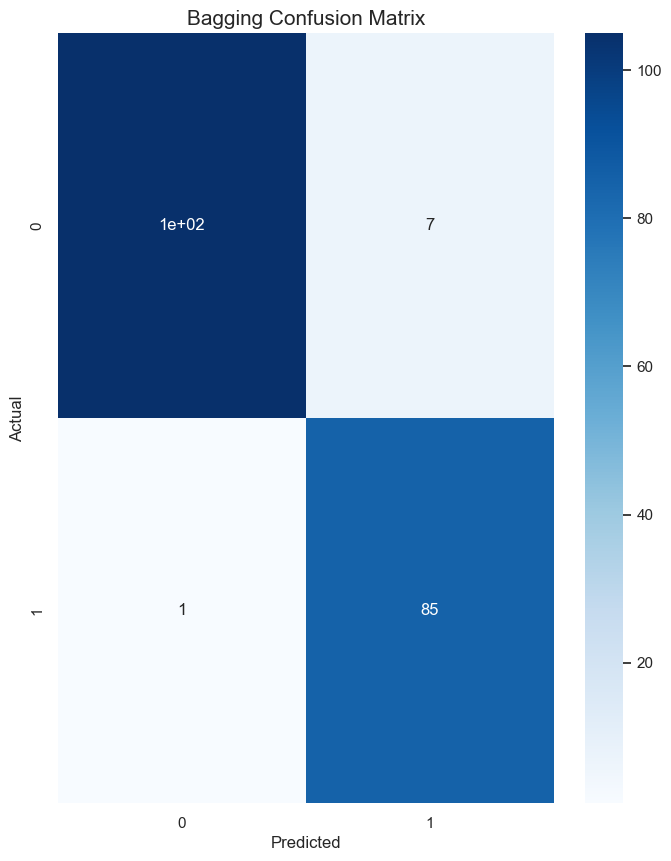

In [181]:
from sklearn.metrics import confusion_matrix
bag_conf_matrix = confusion_matrix(y_test,bag_y_hat)
sns.heatmap(bag_conf_matrix,annot=True,cmap='Blues')
plt.title('Bagging Confusion Matrix',size=15)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig('Bagging conf matrix.png')

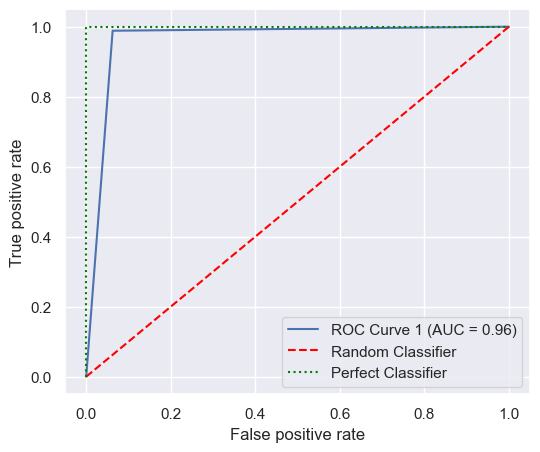

In [182]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr , tpr , _ = roc_curve(y_test, bag_y_hat )
auc = roc_auc_score(y_test, bag_y_hat)
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC Curve 1 (AUC = %0.2f)' % (auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.savefig('Bagging AUC ROC.png')

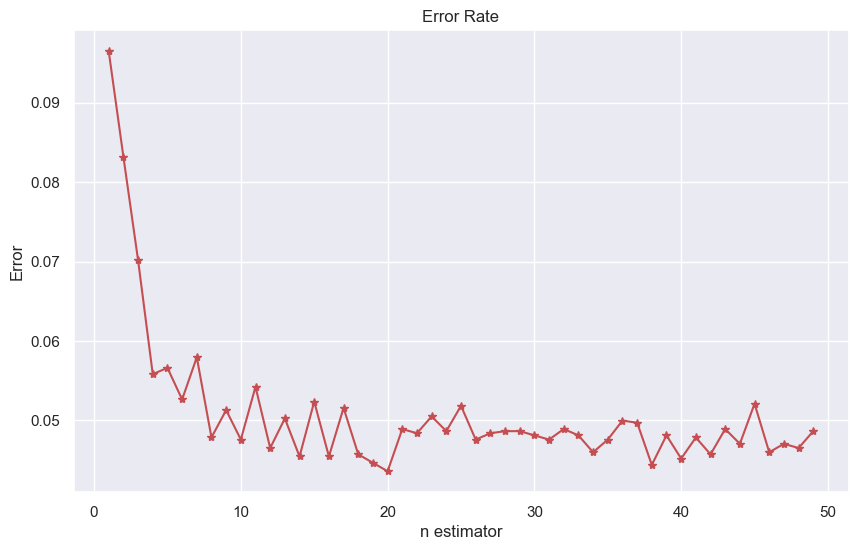

In [183]:
error = []
for i in range(1,50):
    iteration_error = []
    for j in range(1,20):
        bag = BaggingClassifier(n_estimators=i)
        bag.fit(x_smote,y_smote)
        y_hat = bag.predict(x_test)
        iteration_error.append(np.mean(y_hat != y_test))
    error.append(np.mean(iteration_error))
    
plt.figure(figsize=(10,6))    
plt.plot(range(1,50),error,color='r',marker='*')
plt.title('Error Rate')
plt.xlabel('n estimator')
plt.ylabel('Error')
plt.savefig('Bagging Error.png')

# Comparison All of the Models

In [184]:
import sklearn
from sklearn.metrics import precision_score, recall_score, roc_curve, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [185]:
models = []
models.append(['Extra Trees Classifier', ExtraTreesClassifier(n_estimators=etc_n_estimators,
                                criterion=etc_criterion,
                                max_depth=etc_max_depth,
                                min_samples_split=etc_min_samples_split)])
models.append(['Random Forest', RandomForestClassifier(random_state=10)])
models.append(['XGBoost', xgb.XGBClassifier(**xgb_best_params)])
models.append(['AdaBoost', AdaBoostClassifier(n_estimators=abc_n_estimators,
                              learning_rate=abc_learning_rate,
                              algorithm=abc_algorithm)])
models.append(['SVC', SVC(**svc_best_params)])
models.append(['Decision Tree', DecisionTreeClassifier(criterion = dt_criterion,
                              max_depth = dt_max_depth,
                              min_samples_split = dt_min_samples_split,
                              min_samples_leaf = dt_min_samples_leaf,
                              max_features = dt_max_features
)])

models.append(['Bagging', BaggingClassifier(n_estimators=n_estimators)])
models.append(['Boosting', BaggingClassifier(n_estimators=n_estimators)])

lst_1= []
for m in range(len(models)):    
    lst_2= []
    model = models[m][1]    
    model.fit(x_smote, y_smote)
    y_pred = model.predict(x_test)    
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = x_smote, y = y_smote, cv = 5)   #K-Fold Validation    
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score    
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score    
    print(models[m][0],':')
    print(cm)    
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')    
    print(f'Training Accuracy: {model.score(x_smote,y_smote)}')
    print('')    
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')    
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')    
    print('Precision: {:.2f}'.format(precision))
    print('')    
    print('Recall: {:.2f}'.format(recall))
    print('')    
    print('F1: {:.2f}'.format(f1))
    print('-----------------------------------')    
    print('')
    lst_2.append(models[m][0])    
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append((model.score(x_smote,y_smote))*100)     
    lst_2.append(accuracies.mean()*100)
    lst_2.append(roc)    
    lst_2.append(precision)
    lst_2.append(recall)    
    lst_2.append(f1)
    lst_1.append(lst_2)

Extra Trees Classifier :
[[108   4]
 [  0  86]]
Accuracy Score:  0.9797979797979798

Training Accuracy: 1.0

K-Fold Validation Mean Accuracy: 94.38 %

ROC AUC Score: 0.98

Precision: 0.96

Recall: 1.00

F1: 0.98
-----------------------------------

Random Forest :
[[107   5]
 [  0  86]]
Accuracy Score:  0.9747474747474747

Training Accuracy: 1.0

K-Fold Validation Mean Accuracy: 93.51 %

ROC AUC Score: 0.98

Precision: 0.95

Recall: 1.00

F1: 0.97
-----------------------------------

XGBoost :
[[106   6]
 [  1  85]]
Accuracy Score:  0.9646464646464646

Training Accuracy: 1.0

K-Fold Validation Mean Accuracy: 92.64 %

ROC AUC Score: 0.97

Precision: 0.93

Recall: 0.99

F1: 0.96
-----------------------------------

AdaBoost :
[[105   7]
 [  2  84]]
Accuracy Score:  0.9545454545454546

Training Accuracy: 0.9848484848484849

K-Fold Validation Mean Accuracy: 91.56 %

ROC AUC Score: 0.96

Precision: 0.92

Recall: 0.98

F1: 0.95
-----------------------------------

SVC :
[[109   3]
 [  4  82]

In [186]:
df_modeling = pd.DataFrame(lst_1, columns= ['Model', 'Test Accuracy', 'Train Accuracy', 'K-Fold Mean Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df_modeling

,Model,Test Accuracy,Train Accuracy,K-Fold Mean Accuracy,ROC AUC,Precision,Recall,F1
0,Extra Trees Classifier,97.98,100.00,94.38,0.98,0.96,1.00,0.98
1,Random Forest,97.47,100.00,93.51,0.98,0.95,1.00,0.97
2,XGBoost,96.46,100.00,92.64,0.97,0.93,0.99,0.96
3,AdaBoost,95.45,98.48,91.56,0.96,0.92,0.98,0.95
4,SVC,96.46,100.00,95.46,0.96,0.96,0.95,0.96
5,Decision Tree,93.43,97.40,88.96,0.94,0.90,0.95,0.93
6,Bagging,96.97,100.00,90.69,0.97,0.93,1.00,0.97
7,Boosting,95.45,99.78,90.48,0.96,0.91,0.99,0.95
